# КВБО-01-21 Марченко Сергей

# 1
## Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

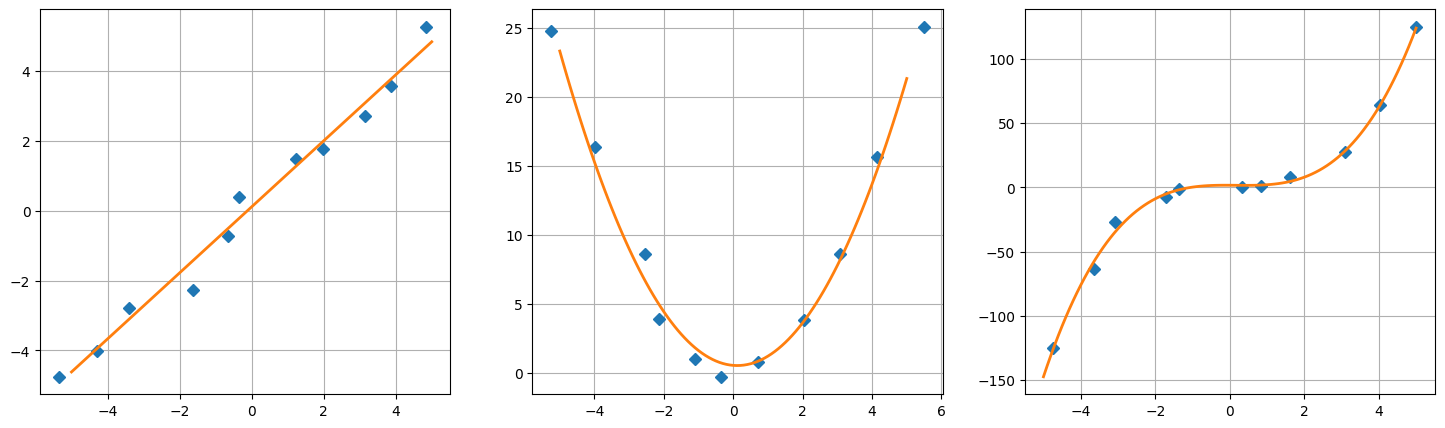

In [4]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

delta = 1.0
sample_size = 11
x_prec = linspace(-5, 5, 101)
plt.figure(figsize=(18, 5))
rng = default_rng()

# First order
x = linspace(-5, 5, sample_size)
y = x + delta * (rng.random(sample_size) - .5)
x += delta * (rng.random(sample_size) - 0.5)

m = vstack([x, ones(sample_size)]).T
s = linalg.lstsq(m, y, rcond=None)[0]

plt.subplot(131)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec + s[1], '-', lw=2)
plt.grid()

# Second order
x = linspace(-5, 5, sample_size)
y = x ** 2 + delta * (rng.random(sample_size) - .5)
x += delta * (rng.random(sample_size) - 0.5)

m = vstack([x ** 2, x, ones(sample_size)]).T
s = linalg.lstsq(m, y, rcond=None)[0]

plt.subplot(132)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()

# Third order
x = linspace(-5, 5, sample_size)
y = x ** 3 + delta * (rng.random(sample_size) - .5)
x += delta * (rng.random(sample_size) - 0.5)

m = vstack([x ** 3, x ** 2, x, ones(sample_size)]).T
s = linalg.lstsq(m, y, rcond=None)[0]

plt.subplot(133)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=2)
plt.grid()

plt.show()

# 2
## Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

𝑓(𝑥, 𝑏) = 𝑏₀ + 𝑏₁𝑥
Beta optimization:  [0.60678116 0.72115558]
Linear deviance:    7.74283445489274e-06
Quadratic deviance: 0.009119735688383685

𝑓(𝑥, 𝑏) = 𝑏₀ + 𝑏₁𝑥 + 𝑏₂𝑥²
Beta optimization:  [0.74120917 0.83353173 0.27032664]
Linear deviance:    7.348586403962029e-06
Quadratic deviance: 0.008467687460721497

𝑓(𝑥, 𝑏) = 𝑏₀ + 𝑏₁𝑙𝑛(𝑥)
Beta optimization:  [0.45956904 0.70025927]
Linear deviance:    4.811926942801343e-06
Quadratic deviance: 0.011545350273383825

𝑓(𝑥, 𝑏) = 𝑏₀𝑥^𝑏₁
Beta optimization:  [0.64199817 0.48043735]
Linear deviance:    2.2506260018230482e-06
Quadratic deviance: 0.007683052074530738


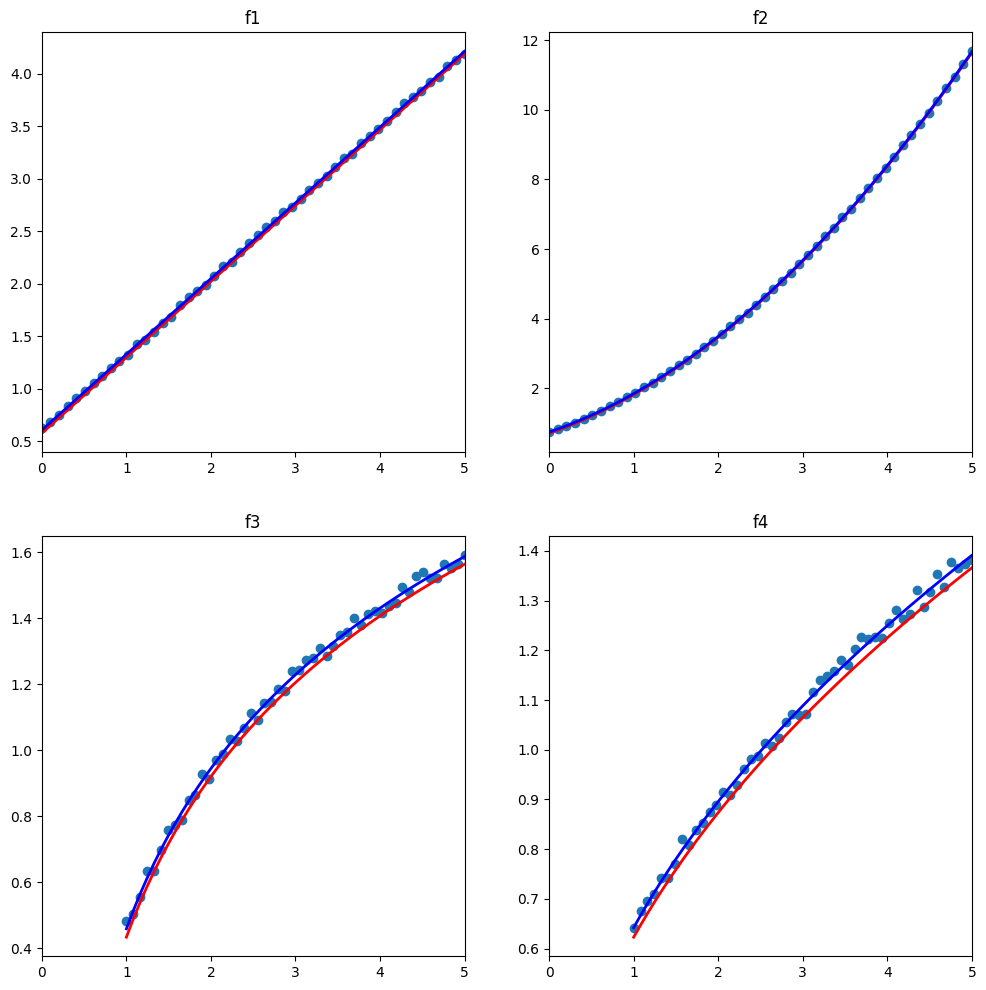

In [39]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt


def f1(x, b0, b1):
    return b0 + b1 * x


def f2(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x ** 2


def f3(x, b0, b1):
    return b0 + b1 * np.log(x)


def f4(x, b0, b1):
    return b0 * x ** b1


def process_function(x, f, beta, ax):
    y = f(x, *beta)

    y_data = y + 0.05 * rng.random(len(x))
    beta_opt, beta_cov = sp.optimize.curve_fit(f, x, y_data)

    print(f'Beta optimization:  {beta_opt}')
    print(f'Linear deviance:    {sum(beta_cov)}')
    print(f'Quadratic deviance: {sum(((y_data - f(x, *beta_opt)) ** 2))}')

    ax.scatter(x, y_data)
    ax.plot(x, y, 'r', lw=2)
    ax.plot(x, f(x, *beta_opt), 'b', lw=2)
    ax.set_xlim(0, 5)
    ax.set_title(f.__name__)


rng = np.random.default_rng()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
ax1, ax2, ax3, ax4 = np.array(axes).flatten()

x_data_0 = np.linspace(0, 5, 50)
x_data_1 = np.linspace(1, 5, 50)

print('𝑓(𝑥, 𝑏) = 𝑏₀ + 𝑏₁𝑥')
process_function(x_data_0, f1, rng.random(2), ax1)
print('\n𝑓(𝑥, 𝑏) = 𝑏₀ + 𝑏₁𝑥 + 𝑏₂𝑥²')
process_function(x_data_0, f2, rng.random(3), ax2)
print('\n𝑓(𝑥, 𝑏) = 𝑏₀ + 𝑏₁𝑙𝑛(𝑥)')
process_function(x_data_1, f3, rng.random(2), ax3)
print('\n𝑓(𝑥, 𝑏) = 𝑏₀𝑥^𝑏₁')
process_function(x_data_1, f4, rng.random(2), ax4)

plt.show()

# 3
## Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы: https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv. <br>Найдите коэффициенты линии регрессии. Постройте прогноз.

Regression coefficient: [9312.57512673]


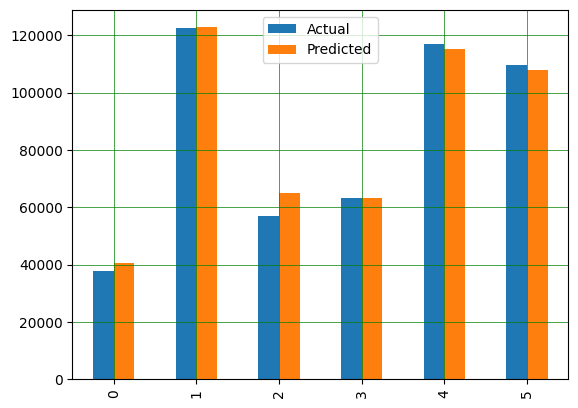

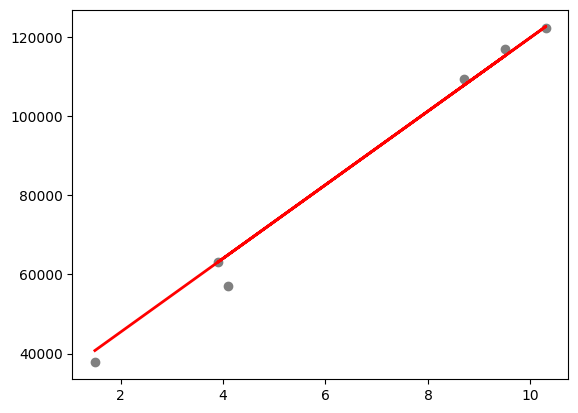

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

csv = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(csv)

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(f'Regression coefficient: {regressor.coef_}')

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(x_test, y_test, color='grey')
plt.plot(x_test, y_pred, color='red', lw=2)
plt.show()

# 4
## Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

csv = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
dataset = pd.read_csv(csv)

x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

coef_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coef_df

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

LinearRegression()

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
...,...,...
794,6,6.559757
813,4,6.017576
1322,5,6.251291
704,4,5.163926


Mean Squared Error: 0.3844711978201246


# 5.4
## Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.

<Figure size 1000x400 with 0 Axes>

           x         y
0   2.000000  6.095238
1   2.157895  5.892231
2   2.315789  5.689223
3   2.473684  5.486216
4   2.631579  5.283208
5   2.789474  5.080201
6   2.947368  4.877193
7   3.105263  4.674185
8   3.263158  4.471178
9   3.421053  4.268170
10  3.578947  4.065163
11  3.736842  3.862155
12  3.894737  3.659148
13  4.052632  3.456140
14  4.210526  3.253133
15  4.368421  3.050125
16  4.526316  2.847118
17  4.684211  2.644110
18  4.842105  2.441103
19  5.000000  2.238095


<AxesSubplot: >

           x          y
0   2.000000  10.857143
1   2.157895   9.652454
2   2.315789   8.559062
3   2.473684   7.576969
4   2.631579   6.706173
5   2.789474   5.946676
6   2.947368   5.298476
7   3.105263   4.761575
8   3.263158   4.335972
9   3.421053   4.021666
10  3.578947   3.818658
11  3.736842   3.726949
12  3.894737   3.746537
13  4.052632   3.877424
14  4.210526   4.119608
15  4.368421   4.473091
16  4.526316   4.937871
17  4.684211   5.513949
18  4.842105   6.201326
19  5.000000   7.000000


<AxesSubplot: >

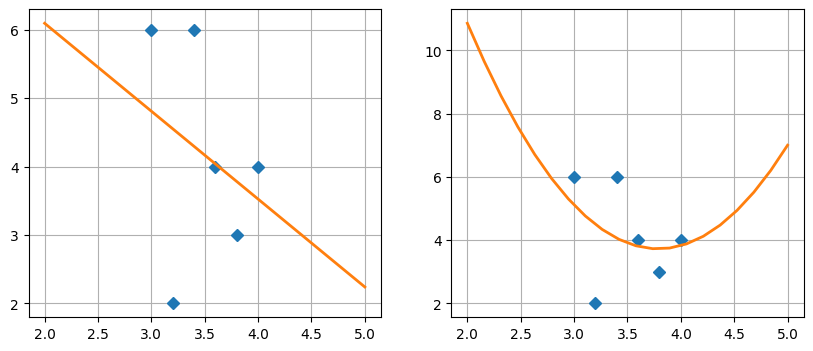

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import *
from numpy.random import *

x = array([3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
y = array([6.0, 2.0, 6.0, 4.0, 3.0, 4.0])
x_prec = linspace(2, 5, 20)
plt.figure(figsize=(10, 4))
rng = default_rng()

# First order
m = vstack([x, ones(len(x))]).T
s = linalg.lstsq(m, y, rcond=None)[0]
y_pred = s[0] * x_prec + s[1]
df = pd.DataFrame({'x': x_prec, 'y': y_pred})
print(df)

plt.subplot(121)
plt.plot(x, y, 'D')
plt.plot(x_prec, y_pred, '-', lw=2)
plt.grid()

# Second order
m = vstack([x ** 2, x, ones(len(x))]).T
s = linalg.lstsq(m, y, rcond=None)[0]
y_pred = s[0] * x_prec ** 2 + s[1] * x_prec + s[2]
df = pd.DataFrame({'x': x_prec, 'y': y_pred})
print(df)

plt.subplot(122)
plt.plot(x, y, 'D')
plt.plot(x_prec, y_pred, '-', lw=2)
plt.grid()

plt.show()